# Aditya Goswami

## Research question/interests

My research question is: I'll try to find which months and provinces were the costliest to live in, by comparing the housing index throughout the years in our dataset?

For answering the question I'll have to work on the monthly index dataset and compare the values of the housing index throughout the years, grouping them by different provinces. Finding which months were the costliest to live in and which provinces saw a hike in prices in a particular year. My visualization would mostly include the comparison of the index value VS the provinces and the months.


In [15]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")

In [16]:
df_index= pd.read_csv("../data/raw/Montly Data/Montly-index.csv")

In [17]:
df_index

,REF_DATE,GEO,DGUID,New housing price indexes,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1981-01,Canada,2016A000011124,Total (house and land),"Index, 201612=100",347,units,0,v111955442,1.1,38.2,NaN,NaN,NaN,1
1,1981-01,Canada,2016A000011124,House only,"Index, 201612=100",347,units,0,v111955443,1.2,36.1,NaN,NaN,NaN,1
2,1981-01,Canada,2016A000011124,Land only,"Index, 201612=100",347,units,0,v111955444,1.3,40.6,E,NaN,NaN,1
3,1981-01,Atlantic Region,2016A00011,Total (house and land),"Index, 201612=100",347,units,0,v111955445,2.1,NaN,..,NaN,NaN,1
4,1981-01,Atlantic Region,2016A00011,House only,"Index, 201612=100",347,units,0,v111955446,2.2,NaN,..,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60475,2022-12,"Vancouver, British Columbia",2011S0503933,House only,"Index, 201612=100",347,units,0,v111955557,39.2,126.8,NaN,NaN,NaN,1
60476,2022-12,"Vancouver, British Columbia",2011S0503933,Land only,"Index, 201612=100",347,units,0,v111955558,39.3,121.4,E,NaN,NaN,1
60477,2022-12,"Victoria, British Columbia",2011S0503935,Total (house and land),"Index, 201612=100",347,units,0,v111955559,40.1,125.0,NaN,NaN,NaN,1
60478,2022-12,"Victoria, British Columbia",2011S0503935,House only,"Index, 201612=100",347,units,0,v111955560,40.2,131.9,NaN,NaN,NaN,1


In [18]:
df_quality = pd.read_csv("../data/raw/Quality Long-Form Data/Housing-quality.csv")

In [19]:
df_quality

,REF_DATE,GEO,DGUID,Coordinate,Long-form data quality indicators – Housing characteristics (20):Tenure - Non-response rate[1],Symbol,Long-form data quality indicators – Housing characteristics (20):Tenure - Imputation rate[2],Symbol.1,Long-form data quality indicators – Housing characteristics (20):Condominium status - Non-response rate[3],Symbol.2,...,Long-form data quality indicators – Housing characteristics (20):Monthly mortgage payments - Imputation rate[16],Symbol.15,Long-form data quality indicators – Housing characteristics (20):Value (owner estimated) - Non-response rate[17],Symbol.16,Long-form data quality indicators – Housing characteristics (20):Value (owner estimated) - Imputation rate[18],Symbol.17,Long-form data quality indicators – Housing characteristics (20):Monthly use or occupancy payment for dwelling - Non-response rate[19],Symbol.18,Long-form data quality indicators – Housing characteristics (20):Monthly use or occupancy payment for dwelling - Imputation rate[20],Symbol.19
0,2021,Canada,2021A000011124,1,3.0,NaN,2.8,NaN,3.0,NaN,...,5.0,NaN,5.9,NaN,7.1,NaN,44.5,NaN,44.8,NaN
1,2021,Newfoundland and Labrador,2021A000210,2,2.4,NaN,2.1,NaN,2.3,NaN,...,4.1,NaN,5.0,NaN,5.7,NaN,52.7,NaN,52.7,NaN
2,2021,"St. John's (CMA), N.L.",2021S0503001,3,2.0,NaN,1.7,NaN,1.8,NaN,...,3.3,NaN,3.7,NaN,4.5,NaN,0.0,NaN,0.0,NaN
3,2021,Holyrood (1001472) T,2021A00051001472,4,2.5,NaN,2.5,NaN,2.5,NaN,...,7.8,NaN,7.8,NaN,9.0,NaN,0.0,NaN,0.0,NaN
4,2021,Conception Bay South (1001485) T,2021A00051001485,5,1.9,NaN,1.7,NaN,1.9,NaN,...,3.6,NaN,3.9,NaN,4.9,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,2021,"Whitehorse, Unorganized (6001060) NO",2021A00056001060,1169,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,NaN,15.8,NaN,26.3,NaN,0.0,NaN,0.0,NaN
1169,2021,Northwest Territories,2021A000261,1170,12.5,NaN,12.5,NaN,13.6,NaN,...,13.6,NaN,16.7,NaN,17.6,NaN,30.0,NaN,30.0,NaN
1170,2021,"Yellowknife (CA), N.W.T.",2021S0504995,1171,2.0,NaN,1.8,NaN,1.9,NaN,...,2.7,NaN,2.8,NaN,3.9,NaN,0.0,NaN,0.0,NaN
1171,2021,Yellowknife (6106023) CY,2021A00056106023,1172,2.0,NaN,1.8,NaN,1.9,NaN,...,2.7,NaN,2.8,NaN,3.9,NaN,0.0,NaN,0.0,NaN


## Displaying the columns i'll be using for my data analysis majorly!

In [20]:
df = df_index.drop(columns=['DGUID','New housing price indexes','UOM','UOM_ID','SCALAR_FACTOR','SCALAR_ID','VECTOR','COORDINATE','STATUS','SYMBOL','TERMINATED','DECIMALS'])
print(df)

      REF_DATE                          GEO  VALUE
0      1981-01                       Canada   38.2
1      1981-01                       Canada   36.1
2      1981-01                       Canada   40.6
3      1981-01              Atlantic Region    NaN
4      1981-01              Atlantic Region    NaN
...        ...                          ...    ...
60475  2022-12  Vancouver, British Columbia  126.8
60476  2022-12  Vancouver, British Columbia  121.4
60477  2022-12   Victoria, British Columbia  125.0
60478  2022-12   Victoria, British Columbia  131.9
60479  2022-12   Victoria, British Columbia  110.8

[60480 rows x 3 columns]


In [21]:
df["VALUE"].describe()

count    49654.000000
mean        75.954119
std         27.162678
min         16.700000
25%         52.500000
50%         81.100000
75%         98.600000
max        212.400000
Name: VALUE, dtype: float64

## Calculating the mean of Housing index value specifying it to the Geo location Canada.

In [22]:
value_mean = df.loc[df['GEO'] == 'Canada', 'VALUE'].mean()
print(df)
print(value_mean)

      REF_DATE                          GEO  VALUE
0      1981-01                       Canada   38.2
1      1981-01                       Canada   36.1
2      1981-01                       Canada   40.6
3      1981-01              Atlantic Region    NaN
4      1981-01              Atlantic Region    NaN
...        ...                          ...    ...
60475  2022-12  Vancouver, British Columbia  126.8
60476  2022-12  Vancouver, British Columbia  121.4
60477  2022-12   Victoria, British Columbia  125.0
60478  2022-12   Victoria, British Columbia  131.9
60479  2022-12   Victoria, British Columbia  110.8

[60480 rows x 3 columns]
71.83955026455025


## The MAX and MIN value of the Housing Index!

In [23]:
minval = df['VALUE'].min()
maxval = df['VALUE'].max()

# Print results
print("The Minimum value of Housing Index: ", minval)
print("The Maximum value of Housing Index: ", maxval)

The Minimum value of Housing Index:  16.7
The Maximum value of Housing Index:  212.4


## Grouping the Data we need by months thoughout the years

In [25]:
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'])
df['MONTH'] = df['REF_DATE'].dt.month
df

,REF_DATE,GEO,VALUE,MONTH
0,1981-01-01,Canada,38.2,1
1,1981-01-01,Canada,36.1,1
2,1981-01-01,Canada,40.6,1
3,1981-01-01,Atlantic Region,NaN,1
4,1981-01-01,Atlantic Region,NaN,1
...,...,...,...,...
60475,2022-12-01,"Vancouver, British Columbia",126.8,12
60476,2022-12-01,"Vancouver, British Columbia",121.4,12
60477,2022-12-01,"Victoria, British Columbia",125.0,12
60478,2022-12-01,"Victoria, British Columbia",131.9,12


In [28]:
df_index_month = df.groupby(["MONTH","VALUE"]).agg('mean','count')
df_index_month

Empty DataFrame
Columns: []
Index: [(1, 16.7), (1, 18.7), (1, 18.8), (1, 19.0), (1, 19.3), (1, 19.4), (1, 19.6), (1, 19.8), (1, 20.3), (1, 20.4), (1, 20.5), (1, 20.7), (1, 20.9), (1, 21.2), (1, 21.7), (1, 21.8), (1, 22.2), (1, 22.4), (1, 22.5), (1, 22.6), (1, 22.7), (1, 22.8), (1, 23.1), (1, 23.2), (1, 23.3), (1, 23.4), (1, 23.6), (1, 23.8), (1, 23.9), (1, 24.1), (1, 24.2), (1, 24.3), (1, 24.5), (1, 24.7), (1, 24.8), (1, 24.9), (1, 25.0), (1, 25.1), (1, 25.2), (1, 25.3), (1, 25.5), (1, 25.6), (1, 25.7), (1, 25.8), (1, 26.0), (1, 26.1), (1, 26.2), (1, 26.4), (1, 26.5), (1, 26.6), (1, 26.7), (1, 26.8), (1, 26.9), (1, 27.0), (1, 27.1), (1, 27.2), (1, 27.4), (1, 27.7), (1, 27.8), (1, 27.9), (1, 28.0), (1, 28.2), (1, 28.3), (1, 28.4), (1, 28.5), (1, 28.8), (1, 29.1), (1, 29.2), (1, 29.3), (1, 29.4), (1, 29.5), (1, 29.7), (1, 29.9), (1, 30.0), (1, 30.1), (1, 30.3), (1, 30.4), (1, 30.5), (1, 30.6), (1, 30.7), (1, 30.8), (1, 30.9), (1, 31.0), (1, 31.2), (1, 31.3), (1, 31.4), (1, 31.5), (1, 31.7), (1, 31.8), (1, 31.9), (1, 32.0), (1, 32.1), (1, 32.2), (1, 32.3), (1, 32.4), (1, 32.5), (1, 32.6), (1, 32.7), (1, 32.8), (1, 32.9), ...]

[11803 rows x 0 columns]

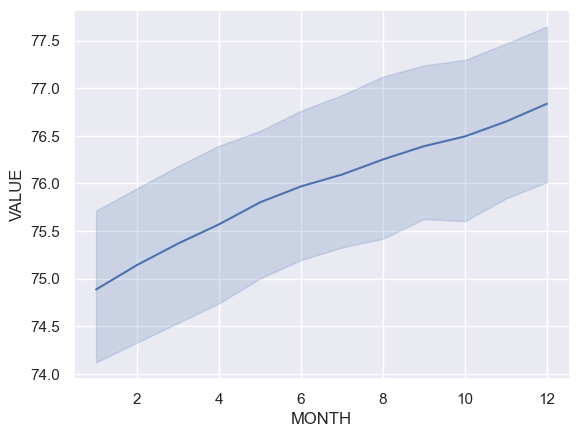

In [31]:
a = sns.lineplot(data=df, x= df["MONTH"], y= df["VALUE"])